# Analysis of call records

This notebook shows the code for the analysis and distribution of the personal call records. The aim is to find a relationship between creditworthiness and this analysis.

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
from pandas import DataFrame

%matplotlib inline

## Importing the dataset

* The column **Date** needs to be converted to **pd.to_datetime** so that computation can be made possble.
* The other column **Duration** is actually the time duration of the call. Hence, it needs to be converted to **pd.to_timedelta** to be made suitable for computation

In [2]:
dataset = pd.read_csv("RitvikCallData.csv")
dataset.fillna(0)

# Making a few columns computation-able
dataset["Date"] = pd.to_datetime(dataset["Date"])
dataset["Duration"] = pd.to_timedelta(dataset["Duration"])

# Printing dataset info and first 5 entries
print(dataset.dtypes)
dataset.head()

Name                    object
phoneNumber              int64
Date            datetime64[ns]
Call log                object
Duration       timedelta64[ns]
dtype: object


,Name,phoneNumber,Date,Call log,Duration
0,+911206864811,911206864811,2020-05-30 14:59:00,Dialed,00:00:00
1,01206618200,1206618200,2020-05-30 14:58:00,Dialed,00:00:11
2,+911206864811,911206864811,2020-05-30 14:58:00,Dialed,00:00:00
3,+911206864811,911206864811,2020-05-30 14:52:00,Missed,00:00:00
4,+911206864811,911206864811,2020-05-30 11:41:00,Received,00:03:27


## Finding calls made during the day (9 am to 8 pm)

One importat criteria found by research is if a person makes majority of calls during the day, then he is more likey to repay small amounts of loan. To find this, we analyse the **dt.hour** f the **Date** column, so that we can find count of calls made during the day.

In [3]:
# Array to contain all the "hours" from Date column
Hour = np.array(dataset["Date"].dt.hour)

# List containing all 500 Names from Name column
Name = dataset["Name"]

# List contaning all 500 corresponding Call Log details
Call_log = dataset["Call log"]

In [4]:
# Computing Calls_during_day 
Calls_during_day = []
j = 0

# The loop checks through 500 entries of "Hour" list to see which is between 9 and 20 (8 pm). 
# Correspondingly, entry from Name is appended to List
for i in range(len(Hour)):
    if((Hour[i] >= 9) & (Hour[i] <= 20)):
        Calls_during_day.append(Name[i])


print("Total no. of calls made between 9 a.m. - 8 p.m. (out of 500): ", len(Calls_during_day))

Total no. of calls made between 9 a.m. - 8 p.m. (out of 500):  327


## Finding percentage

In the data of call records, there are many duplicate entries. By the below code, we find there are actually only **50** unique entries.

We then find no. of unique entries made during day. They were **48**

Therefore, for this case, percentage is **96%**

In [5]:
# Variable to store the %age
p = (len(set(Calls_during_day))/len(set(Name))) * 100

print(f"Total no. of Names in record: {len(set(Name))} \nTotal no. of call Names made during day: {len(set(Calls_during_day))}")
print(f"Percentage of calls made during 9 am and 8 pm = {p}%")

Total no. of Names in record: 50 
Total no. of call Names made during day: 48
Percentage of calls made during 9 am and 8 pm = 96.0%


## Visualization

**Finding the count of Dialed, Received, Missed and Rejected calls can be important result. Therefore, the below graph shows the count of call records for these four fields.**

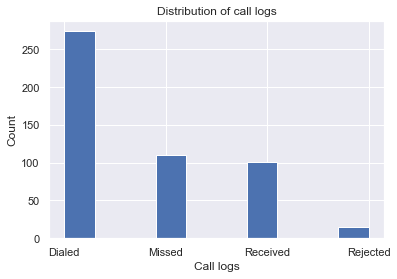

In [6]:
# Visualizing the distribution
sns.set()
labels = set(Name)
data = dataset["Name"]
plt.hist(dataset['Call log'])
plt.xlabel("Call logs")
plt.ylabel("Count")
plt.title("Distribution of call logs")
plt.show()

**Another important visualization is about the duration. Here we find the total duration for Dialed, Received, Missed and Rejected calls. Since, Missed and Rejected calls have 0 duration, we plot the duration of Dialed and Received calls.**

Total duration for Dialed call logs:  1 days 01:51:20

Total duration for Missed call logs:  0 days 00:00:00

Total duration for Received call logs:  0 days 09:09:26

Total duration for Rejected call logs:  0 days 00:00:00

Total hours on phone: 1 days 11:00:46


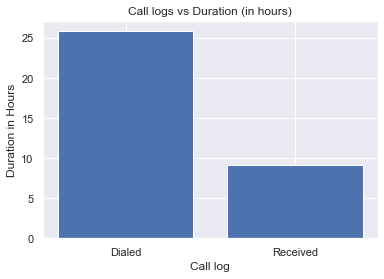

In [7]:
# Visualizing the Durations of Dialed and Received calls

Dialed_hours = dataset[dataset["Call log"]=="Dialed"].Duration.sum()
print("Total duration for Dialed call logs: ", Dialed_hours)
Missed_hours = dataset[dataset["Call log"]=="Missed"].Duration.sum()
print("\nTotal duration for Missed call logs: ", Missed_hours)
Received_hours = dataset[dataset["Call log"]=="Received"].Duration.sum()
print("\nTotal duration for Received call logs: ", Received_hours)
Rejected_hours = dataset[dataset["Call log"]=="Rejected"].Duration.sum()
print("\nTotal duration for Rejected call logs: ", Rejected_hours)

# Converting durations to Hours
Dialed_hours = Dialed_hours / np.timedelta64(1,'h')
Received_hours = Received_hours / np.timedelta64(1,'h')
Total_call_hours = dataset.Duration.sum()

print(f"\nTotal hours on phone: {Total_call_hours}")

# Plotting the results
Calling_arrayList = [Dialed_hours, Received_hours]
labels = ["Dialed", "Received"]
sns.set()
plt.bar(labels, Calling_arrayList)
plt.xlabel("Call log")
plt.ylabel("Duration in Hours")
plt.title("Call logs vs Duration (in hours)")
plt.show()

## Generating sub dataset

For better understanding about each call record, we need to build a sub dataset called **sub_dt1**.

In this new dataset, we want **Dialed_Count, Received_Count, Missed_Count and Rejected_count** for each call entry. 
Also, we need **Dialed_Duration, Received_Duration and Total_Duration** for each call record to see how much the person has talked with his/her circle.

To do this, 
* We first generate **lists** of required data.
* Then we make a **Dictionary**.
* Finally we convert that Dictionary to DataFrame.

### Defining functions

We need to compute many lists and apply many filters to our data. A good way to do that is by defining functions so that we can call it again and again.

The three functions defined below has special tasks:
* The first function computes count for Call logs, i.e. Dialed_Count, Received_Count, Missed_Count and Rejected_count.
* The second function computes Total_Duration of every call record in our data.
* The third function computes Dialed_Duration and Received_Duration for every call record in our data.

*Note: All these computations are performed on **unique entries of Name**, i.e. 50 and not every entry (including duplicates), which is 500.*

In [9]:
'''
Defining function to compute count of Dialed, Received, Missed and Rejected calls for each entry.
Defining function to compute total Dialed and Received Duration sum for each Name entry.
Defining function to compute total Duration for each call Name entry.
'''

unique_name_entries = dataset.Name.unique()
count = 0

# Defining a function to generate a list for Call logs type: Function 1
def Generate_callLogs_list(Type, List):
    for i in range(len(unique_name_entries)):
        count = 0
        for j in range(len(Name)):
            if(Name[j] == unique_name_entries[i]):
                if(Call_log[j] == Type):
                    count+=1
        List.append(count)
    return List


# Defining a function to calculate Total, Dialed and Received duration for each name: Function 2
def Calculate_total_duration(List):
    for i in range(len(unique_name_entries)):
        count = 0
        for j in range(len(Name)):
            count = dataset[dataset["Name"] == unique_name_entries[i]].Duration.sum()
        List.append(count)
    return List

# Defining a function to calculate Dialed and Received duration for each Name: Function 3
def Calculate_type_duration(Type, List):
    for i in range(len(unique_name_entries)):
        count = 0
        for j in range(len(Name)):
            count = dataset[(dataset["Name"] == unique_name_entries[i]) & (dataset["Call log"] == Type)].Duration.sum()
        List.append(count)
    return List


### Generating lists

We now call the above functions to generate our Lists. 

The below code may take some more time than usual to compute (for every function call, loop runs for 25000 times and check for conditions).

In [10]:
Dialed_count = []
Received_count = []
Missed_count = []
Rejected_count = []

Total_duration = []
Dialed_duration = []
Received_duration = []

# Computing Counts
Dialed_count = Generate_callLogs_list("Dialed", Dialed_count)
Received_count = Generate_callLogs_list("Received", Received_count)
Missed_count = Generate_callLogs_list("Missed", Missed_count)
Rejected_count = Generate_callLogs_list("Rejected", Rejected_count)
print("Count of Dialed, Received, Missed and Rejected calls computed.")

# Computng Durations
Total_duration = Calculate_total_duration(Total_duration)
Dialed_duration = Calculate_type_duration("Dialed", Dialed_duration)
Received_duration = Calculate_type_duration("Received", Received_duration)
print("\nDurations computed.")

Count of Dialed, Received, Missed and Rejected calls computed.

Durations computed.


### Generating Dictionary and DataFrame

We now build our **Dictionary** using our Lists, followed by generating the **DataFrame**.

In [11]:
# Making pandas dataframe for this data


Dictionary = {"Name": unique_name_entries, "Dialed_Count": Dialed_count, "Received_Count": Received_count, 
             "Missed_Count": Missed_count, "Rejected_count": Rejected_count, "Dialed_Duration": Dialed_duration,
             "Received_Duration": Received_duration, "Total_Duration": Total_duration}
sub_dt1 = pd.DataFrame(Dictionary)
sub_dt1.head()

,Name,Dialed_Count,Received_Count,Missed_Count,Rejected_count,Dialed_Duration,Received_Duration,Total_Duration
0,+911206864811,2,1,1,0,00:00:00,00:03:27,0 days 00:03:27
1,01206618200,1,0,0,0,00:00:11,NaT,0 days 00:00:11
2,Akanksha Nagpal,181,60,65,12,18:07:22,05:58:31,1 days 00:05:53
3,+911204402400,0,1,0,0,NaT,00:00:40,0 days 00:00:40
4,01204402400,1,0,0,0,00:01:07,NaT,0 days 00:01:07


## Visualizing

From the above sub dataset, we should know how much a person has talked on the corresponding count of Dialed and Received calls. Also, we should know that how much percentage of calls have approx how much total duration.

For this reason, ECDF and Box plot are an importantant tool.

### Making necessary changes

Total, Dialed and Received duration clumns are currently of type **timedelta**, and will not be plotted.
We change the type to array so that it can be plotted.

In [25]:
DD_array = np.array(sub_dt1.Dialed_Duration)
DD_array = DD_array / np.timedelta64(1,'m')

RD_array = np.array(sub_dt1.Received_Duration)
RD_array = RD_array / np.timedelta64(1,'m')

TD_array = np.array(sub_dt1.Total_Duration)
TD_array = RD_array / np.timedelta64(1,'h')

### Plotting ECDF

We plot the ECDF plot for Total_Duration. Here, Total duration has been converted to hours because we want to look at the overall picture.

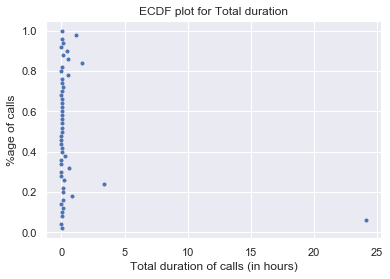

In [31]:
# Generating 'y' for ECDF plot
y = np.arange(1, len(TD_array) + 1)/len(TD_array)

# Plotting
plt.plot(TD_array, y, marker = ".", linestyle = "none")
plt.xlabel("Total duration of calls (in hours)")
plt.ylabel("%age of calls")
plt.title("ECDF plot for Total duration")
plt.show()

### Generating box plots

The line shows the mean value of the data. The upper and lower line of box shows 75th and 25th percentile of the data. Others are outliers. This plot gives us an understanding about the data.

Total no. of unique Dialed_Count: 9



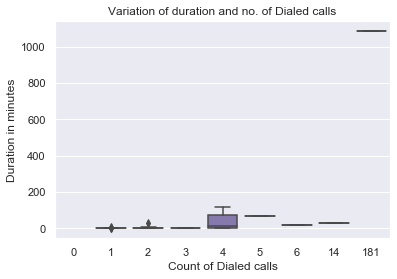

Total no. of unique Received_Count: 7


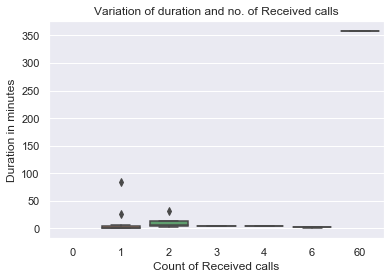

In [30]:
# Generating box plot for observing variance in Dialed Calls and Duration
print(f"Total no. of unique Dialed_Count: {len(sub_dt1.Dialed_Count.unique())}\n")
sns.boxplot(sub_dt1.Dialed_Count, DD_array)
plt.xlabel("Count of Dialed calls")
plt.ylabel("Duration in minutes")
plt.title("Variation of duration and no. of Dialed calls")
plt.show()

# Generating box plot for observing variance in Received Calls and Duration
print(f"Total no. of unique Received_Count: {len(sub_dt1.Received_Count.unique())}")
sns.boxplot(sub_dt1.Received_Count, RD_array)
plt.xlabel("Count of Received calls")
plt.ylabel("Duration in minutes")
plt.title("Variation of duration and no. of Received calls")
plt.show()